In [19]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()

# Convert the dataset into a DataFrame for easier handling
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Feature columns (X) and target (y)
X = df.drop(columns=['target', 'species'])
y = df['target']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Initialize the Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs predicted
comparison_df = pd.DataFrame({
    'Actual': pd.Categorical.from_codes(y_test, iris.target_names),
    'Predicted': pd.Categorical.from_codes(y_pred, iris.target_names)
})


In [20]:
comparison_df.head(10)

,Actual,Predicted
0,versicolor,versicolor
1,setosa,setosa
2,virginica,virginica
3,versicolor,versicolor
4,versicolor,versicolor
5,setosa,setosa
6,versicolor,versicolor
7,virginica,virginica
8,versicolor,versicolor
9,versicolor,versicolor


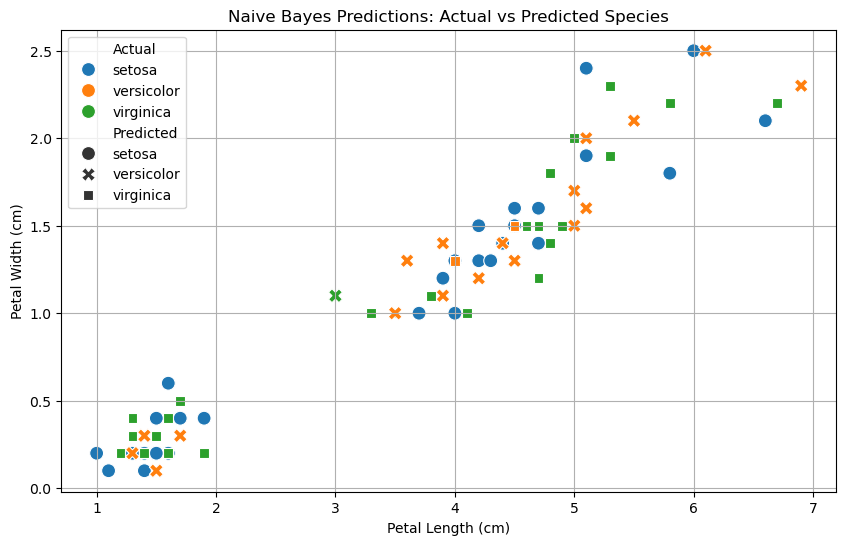

In [21]:
# Create a visualization of the predicted vs actual results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.iloc[:, 2], y=X_test.iloc[:, 3], hue=comparison_df['Actual'], style=comparison_df['Predicted'], s=100)

# Add labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Naive Bayes Predictions: Actual vs Predicted Species')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.show()


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        43
  versicolor       0.97      0.87      0.92        39
   virginica       0.88      0.97      0.93        38

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



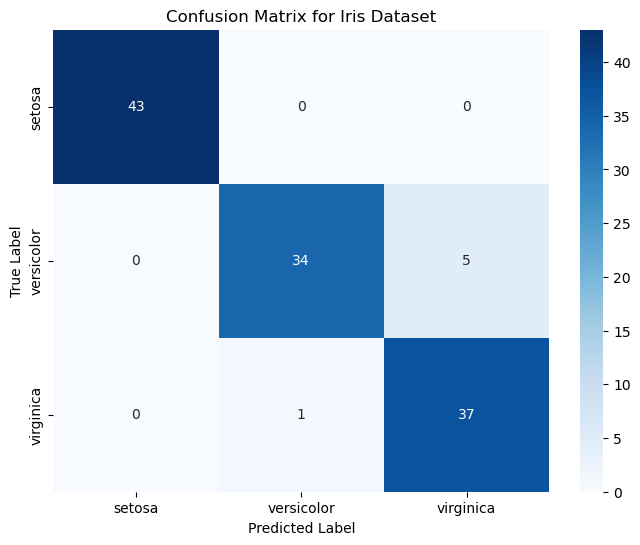

In [22]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for Iris Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()